### Johannes Best codes in the world 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
features_df = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/Features data set.csv")
sales_df = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/sales data-set.csv")
store_df = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/stores data-set.csv")

In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.info()
#date is not a datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [3]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

C:\Users\johan\AppData\Local\Temp\ipykernel_23388\163624348.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df["Date"] = pd.to_datetime(sales_df["Date"])


In [7]:
store_id = features_df["Store"].unique()
store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
import pandas as pd

# Assuming features_df is your DataFrame
# First, filter the DataFrame to include only the relevant columns
selected_columns = ['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5' ]
filtered_df = features_df[selected_columns]

# Then, group the data by the 'store' column and count the null values in each group
null_counts = filtered_df.groupby('Store').apply(lambda group: group.isnull().sum(axis=0))

# Now, null_counts contains the count of null values in the specified columns for each store
print(null_counts)


       Store  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
Store                                                              
1          0         92        109         93         92         92
2          0         92        107         93         92         92
3          0         92        113        104         95         92
4          0         92        107         94         94         92
5          0         92        116        106         98         92
6          0         92        107         94         92         92
7          0         92        116         96         92         92
8          0         92        109         95         94         92
9          0         92        119        105         98         92
10         0         92        114         96         92         92
11         0         92        106         94         94         92
12         0         92        110         98         92         92
13         0         92        107         93   

<Axes: >

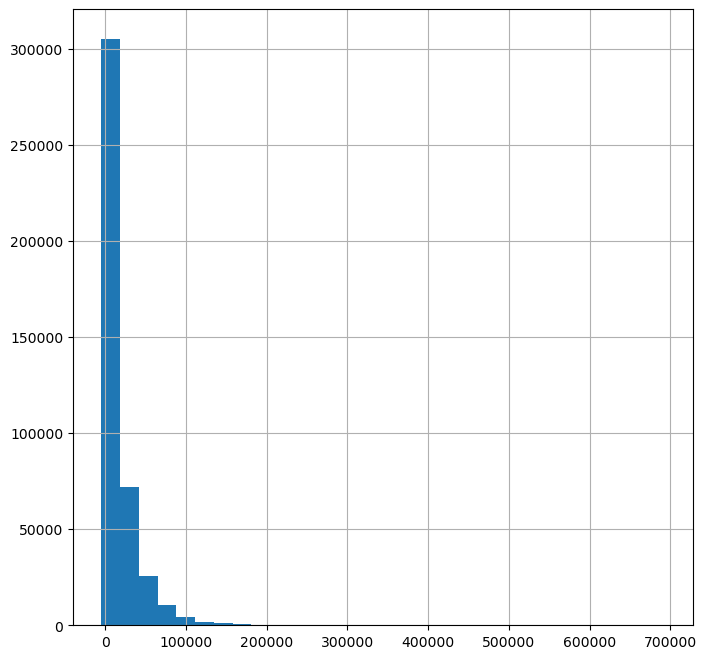

In [10]:
sales_df["Weekly_Sales"].hist(bins=30, figsize=(8,8))

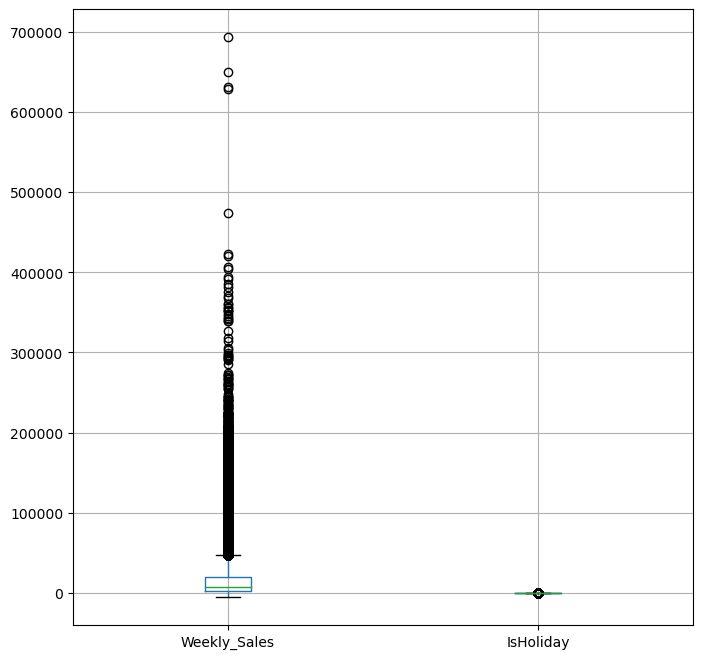

In [11]:
columns_to_include = sales_df.columns[2:]
sales_df[columns_to_include].boxplot(figsize=(8,8))
plt.show()

In [12]:
sales_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
for x in ['Weekly_Sales']:
    q75,q25 = np.percentile(sales_df.loc[:,x],[75,25])
    intr_qr = q75-q25

intr_qr
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
    
 #data points that lie outside of the lower and the upper bound with a NULL value.
sales_df.loc[sales_df[x] < min,x] = np.nan
sales_df.loc[sales_df[x] > max,x] = np.nan

In [14]:
# Assuming features_df is your DataFrame
# First, filter the DataFrame to include only the relevant columns
selected_columns = ["Store",'Weekly_Sales']
filtered_df = sales_df[selected_columns]

# Then, group the data by the 'store' column and count the null values in each group
null_counts = sales_df.groupby('Store').apply(lambda group: group.isnull().sum(axis=0))

# Now, null_counts contains the count of null values in the specified columns for each store
print(null_counts)

       Store  Dept  Date  Weekly_Sales  IsHoliday
Store                                            
1          0     0     0          1337          0
2          0     0     0          1779          0
3          0     0     0           147          0
4          0     0     0          2224          0
5          0     0     0           123          0
6          0     0     0          1340          0
7          0     0     0            90          0
8          0     0     0           458          0
9          0     0     0           161          0
10         0     0     0          2030          0
11         0     0     0          1022          0
12         0     0     0           584          0
13         0     0     0          1933          0
14         0     0     0          1997          0
15         0     0     0           175          0
16         0     0     0           147          0
17         0     0     0           518          0
18         0     0     0           799          0


Based on outlier, we might focus onlu on store 7, 29, 33, 44 as they have the fewest outliers
check for weekly sales for these stores

In [15]:
def show_sales(df, storeNo):
    store_df = df[df["Store"]==storeNo]
    store_df = store_df.sort_values(by="Date")

    plt.figure(figsize=(24, 12))  # Set the figure size
    plt.plot(store_df['Date'], store_df['Weekly_Sales'], marker='o', linestyle='-', color='b')
    plt.show()
    uniqueDept = store_df["Dept"].unique()
    print(np.sort(uniqueDept))
    return store_df

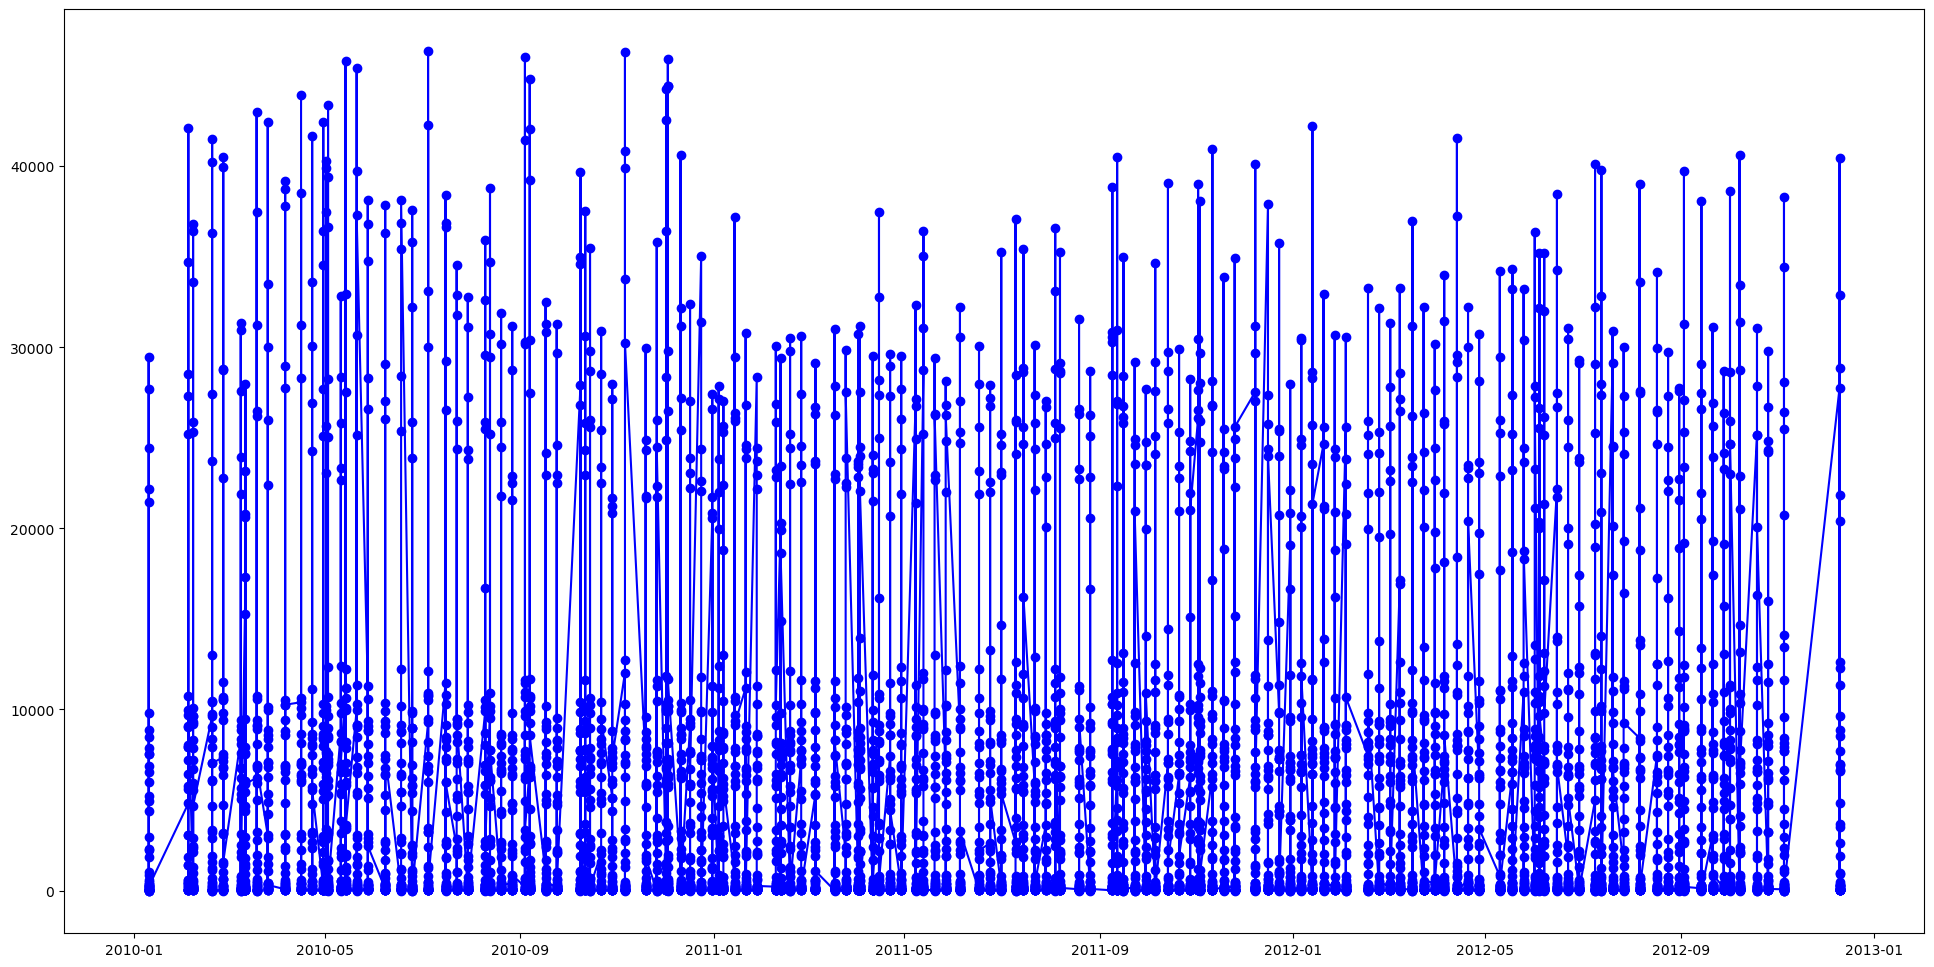

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26
 27 31 32 33 34 35 36 38 40 41 42 44 46 49 52 55 56 59 60 67 71 72 74 79
 80 81 82 83 87 90 91 92 93 94 95 96 97 98 99]


,Store,Dept,Date,Weekly_Sales,IsHoliday
314822,33,7,2010-01-10,249.73,False
319849,33,94,2010-01-10,29446.05,False
315223,33,10,2010-01-10,40.01,False
314082,33,1,2010-01-10,1019.69,False
316784,33,26,2010-01-10,75.75,False
...,...,...,...,...,...
315889,33,14,2012-12-10,925.94,False
316537,33,21,2012-12-10,92.84,False
319669,33,92,2012-12-10,40430.07,False
319812,33,93,2012-12-10,21829.15,False


In [17]:
show_sales(sales_df, 33)

one store as multiple departments

Get total store weekly sales

In [21]:
def total_store_weekly_sales(df, storeNo):
    store_df = df[df["Store"]==storeNo]
    store_df = store_df.sort_values(by="Date")
    weekly_total_sales = store_df.groupby("Date")["Weekly_Sales"].sum().reset_index()
    
    plt.figure(figsize=(24,12))
    plt.plot(weekly_total_sales["Date"], weekly_total_sales["Weekly_Sales"], marker = "o", linestyle= "-", color = "b")
    plt.title("Total Weekly Store Sales")
    plt.xlabel("Date")
    plt.ylabel("Total Store Sales")
    plt.grid(True)
    plt.show()

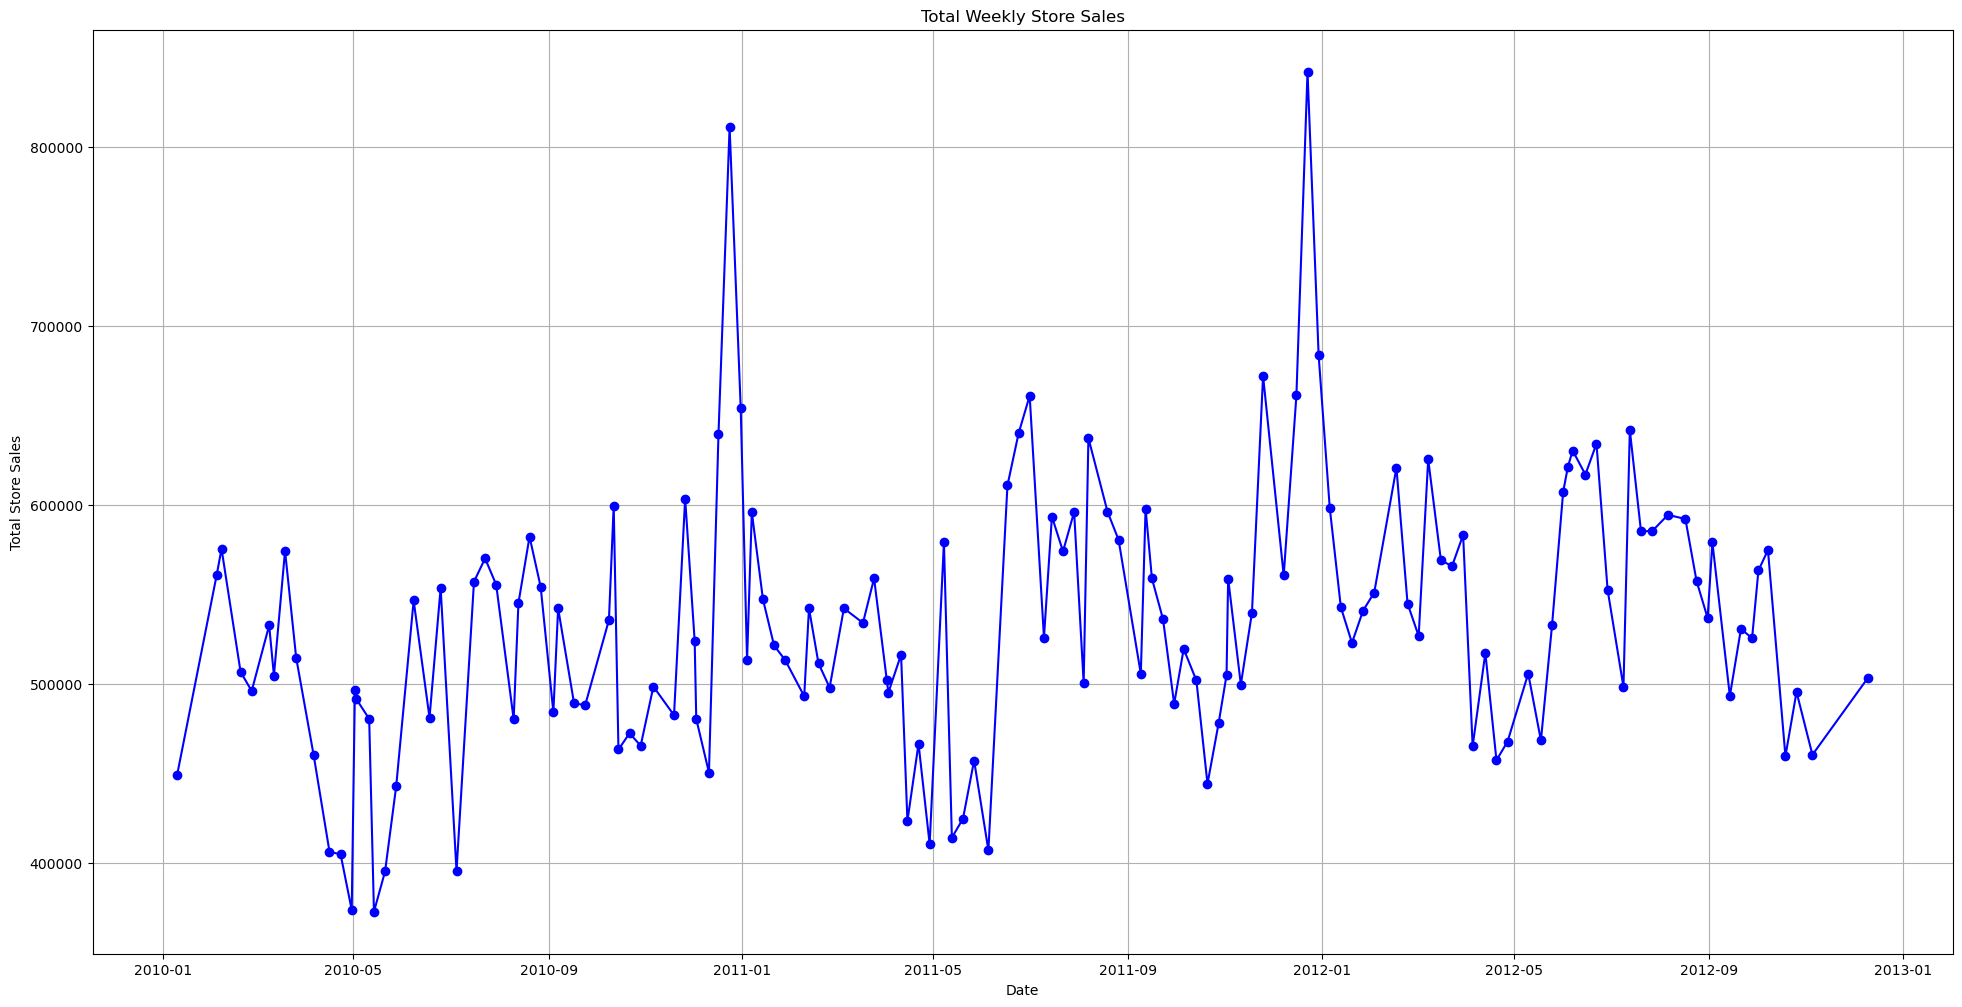

In [22]:
total_store_weekly_sales(sales_df, 7)

In [4]:
def totalsales(df):
    df = df.sort_values(by="Date")
    weekly_total_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
    
    plt.figure(figsize=(24,12))
    plt.plot(weekly_total_sales["Date"], weekly_total_sales["Weekly_Sales"], marker = "o", linestyle= "-", color = "b")
    plt.title("Total Weekly Sales")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.grid(True)
    plt.show()

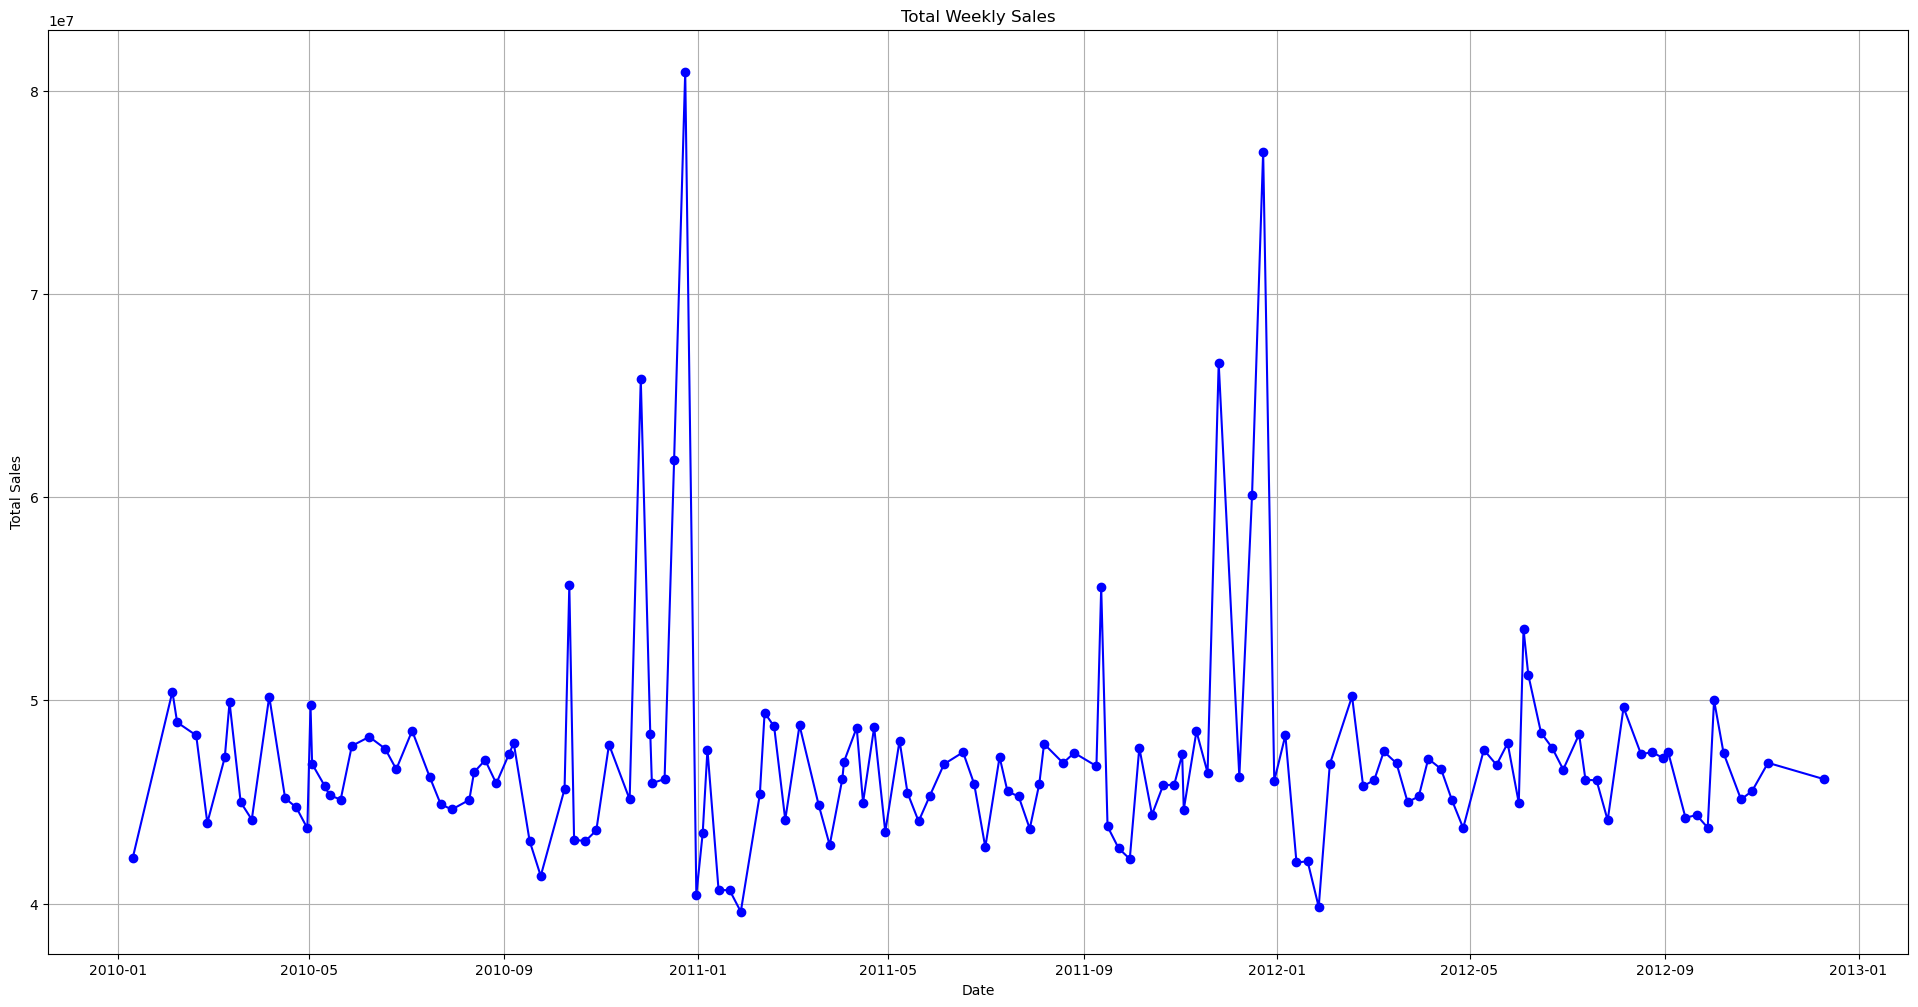

In [5]:
totalsales(sales_df)